In [76]:
from model import layers, activations, networks, utils, optimizers, losses, metrics, paddings
import numpy as np
import matplotlib.pyplot as plt
import random

https://neodelphis.github.io/convnet/maths/python/english/2019/07/10/convnet-bp-en.html

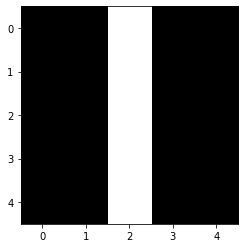

In [77]:
x_train = np.array([
    [
        [[1], [1], [255], [1], [1]],
        [[1], [1], [255], [1], [1]],
        [[1], [1], [255], [1], [1]],
        [[1], [1], [255], [1], [1]],
        [[1], [1], [255], [1], [1]]
    ]
])
x_train = x_train / 255
plt.imshow(x_train[0], cmap='gray')

In [78]:
y_train = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0]
])
y_train.shape

(1, 9)

In [79]:
model = networks.FeedForward([
    layers.Input(input_shape=(5, 5, 1)),
    layers.Convolution(nr_kernels=1, kernel_size=(3, 3), activation=activations.ReLu, padding=paddings.Same),
    layers.Flatten(),
    layers.Output()
])

In [80]:
model.compile(
    optimizer=optimizers.stochastic_gradient_descent(learning_rate=1, momentum=0, nesterov=False),
    loss=losses.categorical_crossentropy,
    metric=metrics.Accuracy)

In [81]:
p = model.predict(x_train[0])
p

array([0.        , 1.07935743, 0.        , 0.        , 1.07935743,
       0.        , 0.        , 1.07935743, 0.        ])

<BarContainer object of 9 artists>

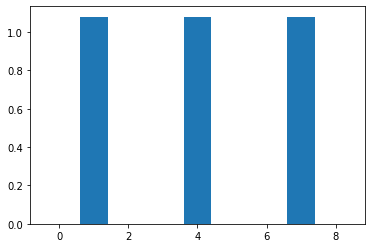

In [82]:
plt.bar(np.linspace(0, 8, 9), p)

In [83]:
i = model.layers[1].i[:, :, 0]
i

array([[0.00392157, 0.00392157, 1.        , 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 1.        , 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 1.        , 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 1.        , 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 1.        , 0.00392157, 0.00392157]])

In [84]:
w = model.layers[1].w[0, 0, :, :]
w

array([[-0.81954488,  0.38379018, -0.58072555],
       [ 0.36978905,  0.93954121,  0.08750807],
       [-0.62999278,  0.50247281, -0.94776938]])

In [85]:
o = model.layers[1].o[:, :, 0]
o

array([[0.        , 1.07935743, 0.        ],
       [0.        , 1.07935743, 0.        ],
       [0.        , 1.07935743, 0.        ]])

In [86]:
loss1 = 0.5 * np.sum(np.power(y_train - p, 2))

In [87]:
L = p - y_train
L

array([[ 0.        ,  1.07935743, -1.        ,  0.        ,  1.07935743,
         0.        ,  0.        ,  1.07935743,  0.        ]])

In [88]:
L_conv = L.reshape(o.shape)
L_conv

array([[ 0.        ,  1.07935743, -1.        ],
       [ 0.        ,  1.07935743,  0.        ],
       [ 0.        ,  1.07935743,  0.        ]])

In [89]:
dw = np.zeros(w.shape)

for y in range(3):
    for x in range(3):
        chunk = i[y : y + 3, x : x + 3]
        dw[y, x] = np.sum(chunk * L_conv)

dw

array([[-0.98730168,  3.23415073,  0.00877675],
       [-0.98730168,  3.23415073,  0.00877675],
       [-0.98730168,  3.23415073,  0.00877675]])

In [90]:
L_conv_p = paddings.Zero(np.expand_dims(L_conv, -1), 2)
L_conv_p = L_conv_p[:, :, 0]
L_conv_p

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.07935743, -1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.07935743,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.07935743,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [91]:
dx = np.zeros(i.shape)

for y in range(5):
    for x in range(5):
        dx[y, x] = np.sum(L_conv_p[y : y + 3, x : x + 3] * np.flipud(np.fliplr(w)))

dx

array([[ 0.        , -0.88458186,  1.23379166, -1.01060062,  0.58072555],
       [ 0.        , -0.4854473 ,  1.05855852, -1.47189916, -0.08750807],
       [ 0.        , -1.16543469,  2.60068811, -2.05781268,  0.94776938],
       [ 0.        , -0.28085283,  1.55644854, -0.92852944,  0.        ],
       [ 0.        , -0.67998739,  0.54234776, -1.02298192,  0.        ]])

In [92]:
db = np.sum(L_conv)
db

2.2380722950614

In [93]:
model.layers[1].w = model.layers[1].w - dw
model.layers[1].b = model.layers[1].b - db

In [94]:
y_train

array([[0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [95]:
loss1

2.247518698007367

In [96]:
p2 = model.predict(x_train[0])
loss2 = 0.5 * np.sum(np.power(y_train - p2, 2))
loss2

0.5

In [97]:
p2

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

<BarContainer object of 9 artists>

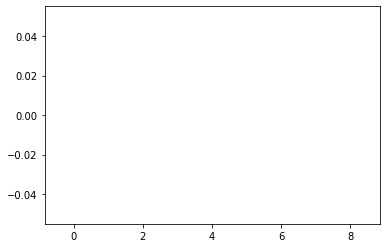

In [98]:
plt.bar(np.linspace(0, 8, 9), p2)

In [99]:
w

array([[-0.81954488,  0.38379018, -0.58072555],
       [ 0.36978905,  0.93954121,  0.08750807],
       [-0.62999278,  0.50247281, -0.94776938]])

In [100]:
model.layers[1].w[0, 0, :, :]

array([[ 0.1677568 , -2.85036055, -0.5895023 ],
       [ 1.35709073, -2.29460952,  0.07873131],
       [ 0.3573089 , -2.73167792, -0.95654613]])